# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [3]:
NAME = "IAD25"
COLLABORATORS = "Adam Lewiński 407657, Małgorzata Serwańska 405044"

---

## Zestaw zadań 5: Weryfikacja hipotez statystycznych (Notatnik 2/2)

In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [6]:
# Dane do testów
x = sp.stats.norm.rvs(loc=10, scale=1.5, size=120, random_state=7)
y = sp.stats.norm.rvs(loc=0, scale=0.25, size=120, random_state=10) * x + 5
test_data_1 = pd.DataFrame(data=np.vstack([x, y]).T, columns=["x", "y"])
test_data_1.head()

,x,y
0,12.535789,9.173122
1,9.301094,6.663219
2,10.049230,1.117479
3,10.611274,4.977759
4,8.816615,6.369520


In [7]:
# Dane do testów
x = sp.stats.uniform.rvs(loc=0, scale=10, size=90, random_state=7)
y = 0.75*x  + sp.stats.norm.rvs(loc=0, scale=0.75, size=90, random_state=42) + 2
test_data_2 = pd.DataFrame(data=np.vstack([x, y]).T, columns=["x", "y"])
test_data_2.head()

,x,y
0,0.763083,2.944848
1,7.799188,7.745693
2,4.384092,5.773836
3,7.234652,8.568261
4,9.779895,9.159306


In [8]:
# Dane do testów
x = sp.stats.uniform.rvs(loc=0, scale=10, size=70, random_state=17)
y = x  + 1.25*np.sin(x) + sp.stats.norm.rvs(loc=1, scale=1.5, size=70, random_state=5)
test_data_3 = pd.DataFrame(data=np.vstack([x, y]).T, columns=["x", "y"])
test_data_3.head()

,x,y
0,2.946650,4.850629
1,5.305868,4.773312
2,1.915208,7.737958
3,0.679004,2.085888
4,7.869855,10.284112


### Zadanie 4: Weryfikacja hipotezy o wartości współczynnika prostej regresji [10 pkt]

Przygotuj funkcję `regression_coefficient_NHST()`, która będzie weryfikować hipotezę o wartości współczynnika równania regresji liniowej i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki t.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk t i t_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występująca w tytule informacja o testowanym współczynniku (a, b) oraz wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku t i t_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: a = 0.3`</br>
    `H1: a ≠ 0.3`</br>
    `t = 1.2140, t_alpha = 2.1448`</br>
    `|t| < t_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [9]:
def regression_coefficient_NHST(data, coef, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks oraz kolumny "x" i "y" z wynikami próby losowej.
    coef: str
        "a" lub "b" w zależności od testowanego współczynnika równania regresji.
    H0: float
        Wartość współczynnika przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość współczynnika jest różna od wartości przyjętej w H0,
        - less: wartość współczynnika jest mniejsza od wartości przyjętej w H0,
        - greater: wartość współczynnika jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    t: float
        Wyliczona na podstawie próby losowej wartość statystyki t.
    t_alpha: float
        Wartość statystyki t_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    res = sp.stats.linregress(data.x, data.y)
    Db = res.intercept_stderr

    if coef == "a":
        t = (res.slope - H0) / res.stderr
    elif coef == "b":
        t = (res.intercept - H0) / res.intercept_stderr
    else:
        raise ValueError("Coef parameter should be eqaul 'a' or 'b'")

    H = 0

    t_low = -1e10
    t_max = 1e10

    title_str = ""
    title_str_condition = "|t| < t_alpha"
    title_final = f"Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"

    if H1 == "two-sided":
        t_alpha = sp.stats.t.ppf(1-alpha/2, len(data.x)-2)
        t_low = min(-t_alpha, t_alpha)
        t_max = max(-t_alpha, t_alpha)
        title_str = f"H1: {coef} ≠ {H0}"
        if abs(t) >= t_alpha:
            title_str_condition = "|t| >= t_alpha"
            H = 1
    elif H1 == "less":
        t_alpha = sp.stats.t.ppf(alpha, len(data.x)-2)
        t_low = t_alpha
        title_str = f"H1: {coef} < {H0}"
        title_str_condition = "t > t_alpha"
        if t <= t_alpha:
            title_str_condition = "t <= t_alpha"
            H = 1
    elif H1 == "greater":
        t_alpha = sp.stats.t.ppf(1-alpha, len(data.x)-2)
        t_max = t_alpha
        title_str = f"H1: {coef} > {H0}"
        title_str_condition = "t < t_alpha"
        if t >= t_alpha:
            title_str_condition = "t >= t_alpha"
            H=1
    else:
        raise ValueError("H1 has wrong value.")

    if H == 1:
        title_final = f"Następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"

    distribution = "t"
    parameters = [str(len(data.x)-1)]

    title = (f"H0: {coef} = {H0}\n"
             f"{title_str}\n"
             f"t = {t:.4f}, t_alpha = {t_alpha:.4f}\n"
             f"{title_str_condition}\n"
             f"{title_final}")

    xl_parameters = parameters.copy()
    xl_parameters.insert(0, "0.0001")

    xr_parameters = parameters.copy()
    xr_parameters.insert(0, "0.9999")

    x_l = eval(f"sp.stats.{distribution}.ppf({','.join(xl_parameters)})")
    x_r = eval(f"sp.stats.{distribution}.ppf({','.join(xr_parameters)})")
    x = np.linspace(x_l, x_r, 1000)
    height = np.max(eval(f"sp.stats.{distribution}.pdf(x, {','.join(parameters)})"))
    height += 1/3*height

    x0 = np.linspace(x_l, t_low, 1000)
    x1 = np.linspace(t_max, x_r, 1000)

    plot_parameters = parameters.copy()
    plot_parameters.insert(0, "x")
    y = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x0"
    y0 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x1"
    y1 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    yt0 = [0 for i in range(len(y0))]
    yt1 = [0 for i in range(len(y1))]

    fig, ax = plt.subplots(1, 1, figsize=(10,5), facecolor="white")
    sns.lineplot(x=x, y=y, ax=ax, color="black")
    ax.fill_between(x0, yt0, y0, color="green")
    ax.fill_between(x1, yt1, y1, color="green")
    ax.set_ylim([0,height])
    ax.set_xlim([x_l, x_r])
    ax.set_facecolor("white")
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("Probability density")

    vline_parameters = parameters.copy()
    vline_parameters.insert(0, "x")
    ax.vlines(x = t,
          ymin = 0,
          ymax = np.max(1/3*eval(f"sp.stats.{distribution}.pdf({','.join(vline_parameters)})")),
          colors = 'red',
          label = 'vline_multiple - full height')

    return (t, t_alpha, H)

C:\Users\Adam\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6373: RuntimeWarning: overflow encountered in power
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))
C:\Users\Adam\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6373: RuntimeWarning: overflow encountered in power
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))
C:\Users\Adam\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6373: RuntimeWarning: overflow encountered in power
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))
C:\Users\Adam\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6373: RuntimeWarning: overflow encountered in power
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))


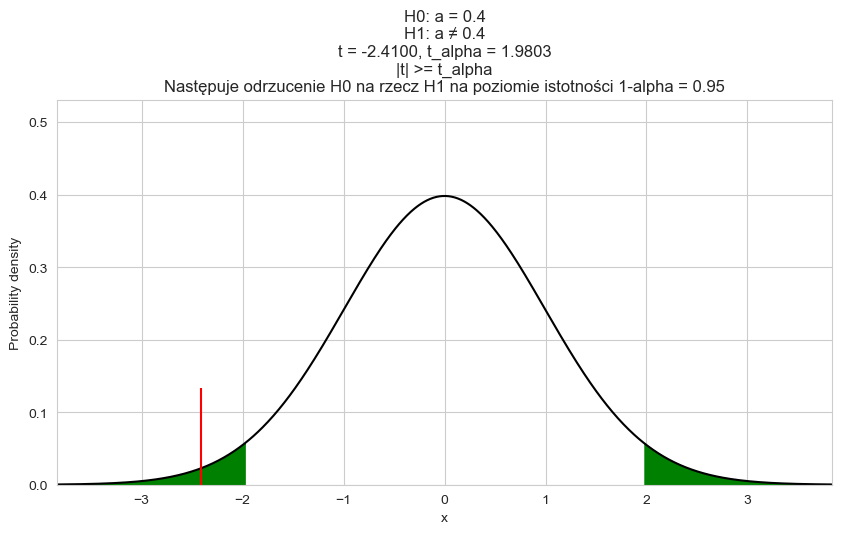

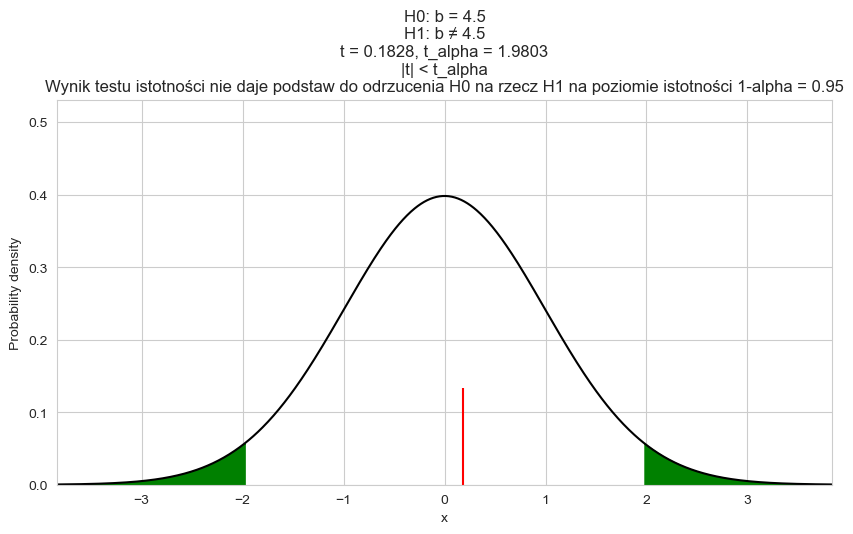

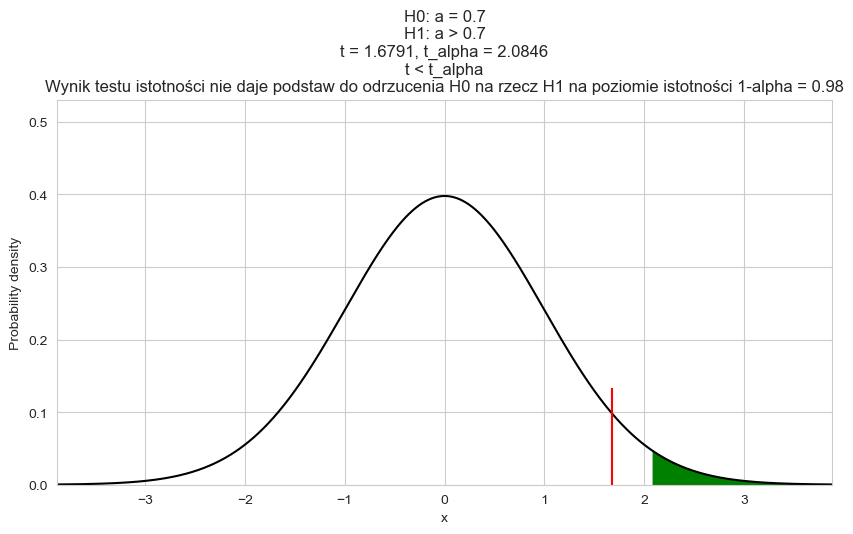

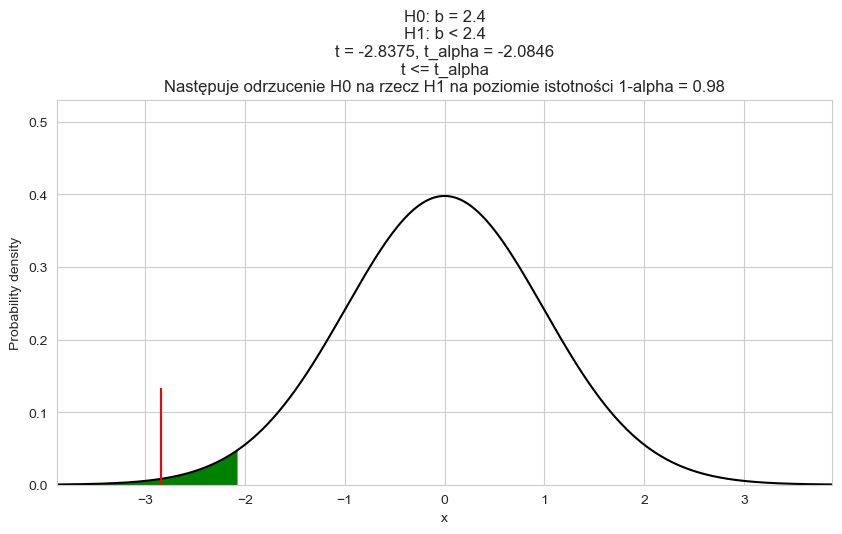

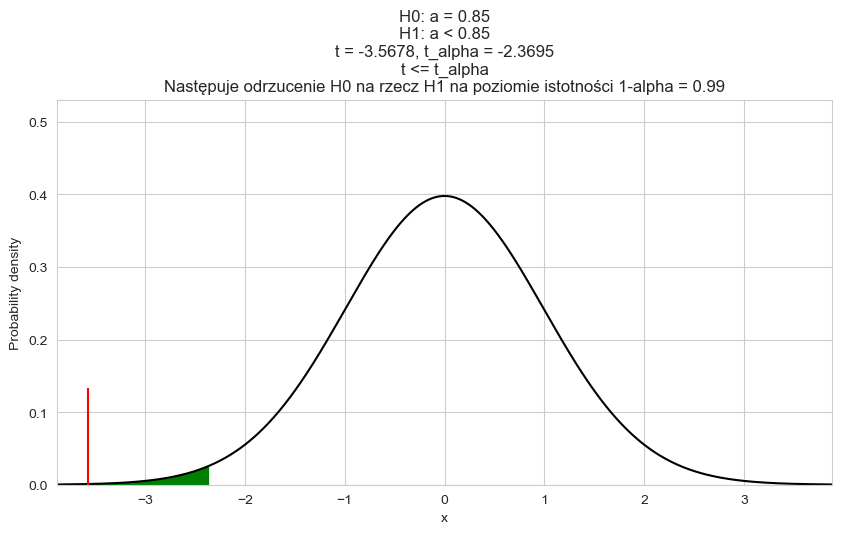

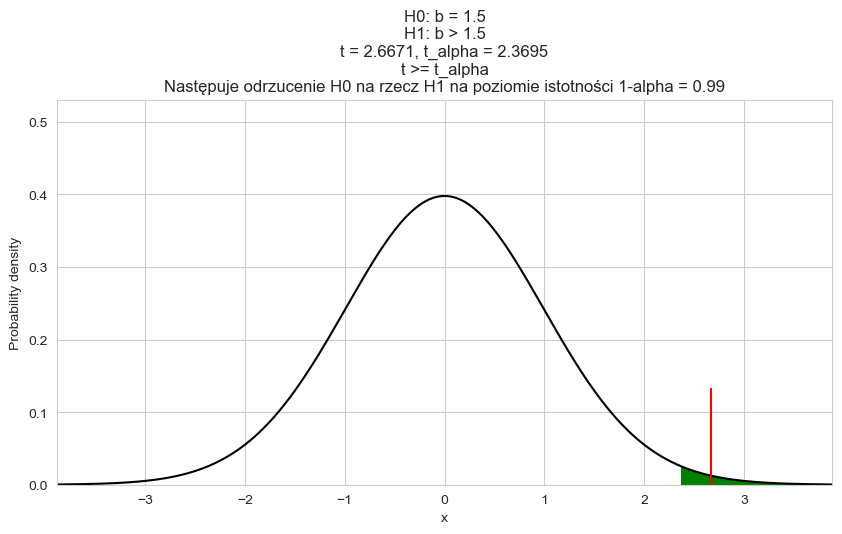

In [10]:
### Komórka testowa

assert np.all(np.isclose(regression_coefficient_NHST(test_data_1, "a", 0.4, "two-sided", 0.05), (-2.4099957692531735, 1.9802722492407059, 1)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_1, "b", 4.5, "two-sided", 0.05), (0.18283553669953134, 1.9802722492407059, 0)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_2, "a", 0.7, "greater", 0.02), (1.6790640072789238, 2.084638091603984, 0)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_2, "b", 2.4, "less", 0.02), (-2.8374847222952546, -2.084638091603984, 1)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_2, "a", 0.85, "less", 0.01), (-3.56782781135344, -2.369472273998314, 1)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_2, "b", 1.5, "greater", 0.01), (2.667124457352881, 2.3694722739983134, 1)))

### Zadanie 5: Weryfikacja hipotezy o losowości próby (test serii) [10 pkt]

Przygotuj funkcję `sample_randomness_NHST()`, która będzie weryfikować hipotezę o losowości próby i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki u.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk u i u_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku u i u_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: Dobór jednostek do próby jest losowy`</br>
    `H1: Dobór jednostek do próby nie jest losowy`</br>
    `u = 1.3462, u_alpha = 1.6449`</br>
    `|u| < u_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [13]:
def sample_randomness_NHST(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks oraz kolumny "x" i "y" z wynikami próby.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    u: float
        Wyliczona na podstawie próby wartość statystyki u.
    u_alpha: float
        Wartość statystyki u_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    res = sp.stats.linregress(data.x, data.y)
    a = res.slope
    b = res.intercept

    df = data.copy()
    df["type"] = ['a' if row.y > row.x*a + b else 'b' if row.y < row.x*a+b else 'c' for _, row in data.iterrows()]
    df = df[df.type != 'c']

    df = df.sort_values(by = ['x'])

    k = 1
    na = 0
    nb = 0
    for i in range(1, len(df)):
        if df.iloc[i, -1] != df.iloc[i-1, -1]:
            k += 1
        if df.iloc[i, -1] == 'a':
            na += 1
        else:
            nb += 1
    if df.iloc[0, -1] == 'a':
        na += 1
    else:
        nb += 1

    sk2 = 2*na*nb * (2*na*nb - len(df)) / len(df) / len(df) / (len(df)-1)
    kexpected = 2*na*nb/len(df) + 1
    u = (k-kexpected)/np.sqrt(sk2)

    H = 0

    title_str_condition = "|u| < u_alpha"
    title_final = f"Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"

    u_alpha = sp.stats.norm.ppf(1-alpha/2)
    u_low = min(-u_alpha, u_alpha)
    u_max = max(-u_alpha, u_alpha)

    title_str = f"H1: Dobór jednostek do próby nie jest losowy"
    if abs(u) >= u_alpha:
        title_str_condition = "|u| >= u_alpha"
        H = 1

    if H == 1:
        title_final = f"Następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"

    distribution = "norm"
    parameters = []

    title = (f"H0: Dobór jednostek do próby jest losowy\n"
             f"{title_str}\n"
             f"u = {u:.4f}, u_alpha = {u_alpha:.4f}\n"
             f"{title_str_condition}\n"
             f"{title_final}")

    xl_parameters = parameters.copy()
    xl_parameters.insert(0, "0.0001")

    xr_parameters = parameters.copy()
    xr_parameters.insert(0, "0.9999")

    x_l = eval(f"sp.stats.{distribution}.ppf({','.join(xl_parameters)})")
    x_r = eval(f"sp.stats.{distribution}.ppf({','.join(xr_parameters)})")
    x = np.linspace(x_l, x_r, 1000)
    height = np.max(eval(f"sp.stats.{distribution}.pdf(x, {','.join(parameters)})"))
    height += 1/3*height

    x0 = np.linspace(x_l, u_low, 1000)
    x1 = np.linspace(u_max, x_r, 1000)

    plot_parameters = parameters.copy()
    plot_parameters.insert(0, "x")
    y = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x0"
    y0 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x1"
    y1 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    yt0 = [0 for i in range(len(y0))]
    yt1 = [0 for i in range(len(y1))]

    fig, ax = plt.subplots(1, 1, figsize=(10,5), facecolor="white")
    sns.lineplot(x=x, y=y, ax=ax, color="black")
    ax.fill_between(x0, yt0, y0, color="green")
    ax.fill_between(x1, yt1, y1, color="green")
    ax.set_ylim([0,height])
    ax.set_xlim([x_l, x_r])
    ax.set_facecolor("white")
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("Probability density")

    vline_parameters = parameters.copy()
    vline_parameters.insert(0, "x")
    ax.vlines(x = u,
          ymin = 0,
          ymax = np.max(1/3*eval(f"sp.stats.{distribution}.pdf({','.join(vline_parameters)})")),
          colors = 'red',
          label = 'vline_multiple - full height')

    return (u, u_alpha, H)

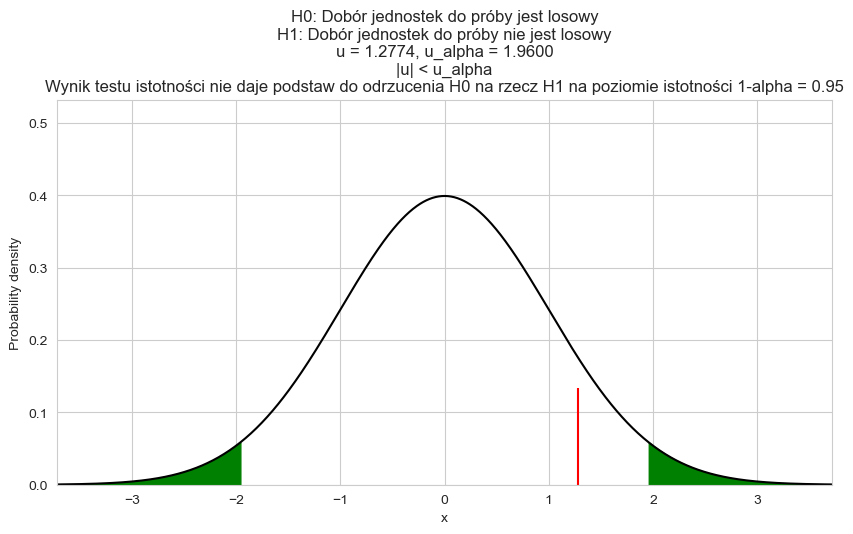

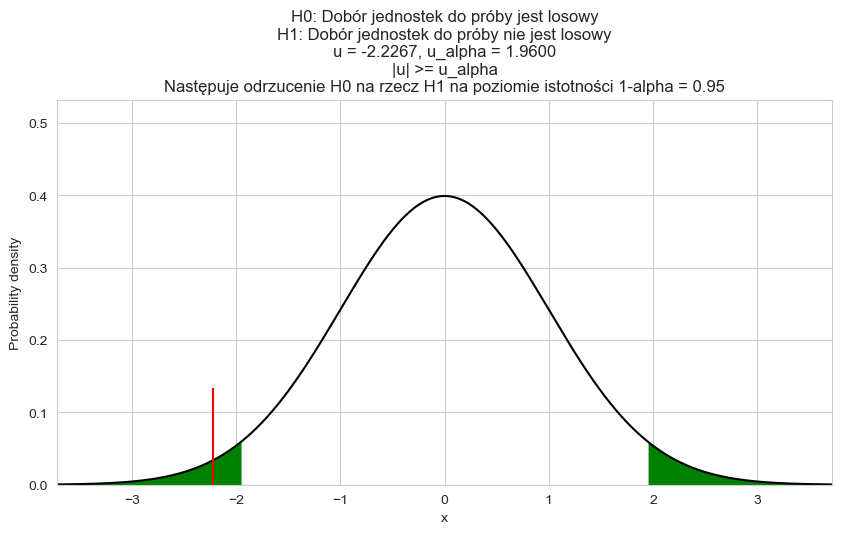

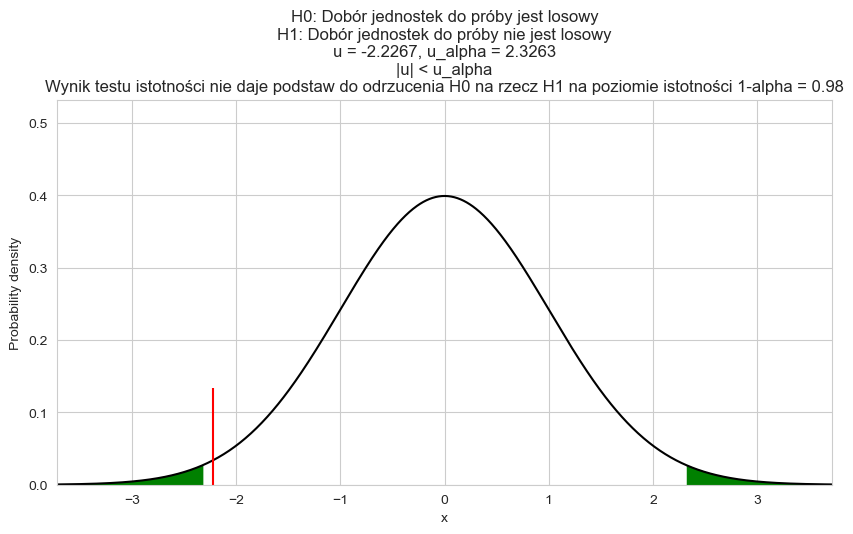

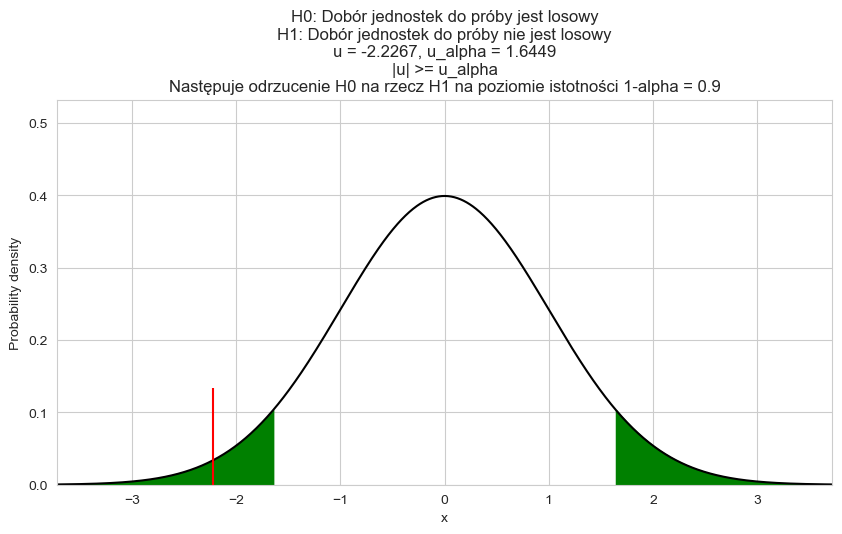

In [14]:
### Komórka testowa

assert np.all(np.isclose(sample_randomness_NHST(test_data_2, 0.05), (1.2774271521862057, 1.959963984540054, 0)))
assert np.all(np.isclose(sample_randomness_NHST(test_data_3, 0.05), (-2.2266930916721734, 1.959963984540054, 1)))
assert np.all(np.isclose(sample_randomness_NHST(test_data_3, 0.02), (-2.2266930916721734, 2.3263478740408408, 0)))
assert np.all(np.isclose(sample_randomness_NHST(test_data_3, 0.1), (-2.2266930916721734, 1.6448536269514722, 1)))